# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

In [23]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


In [24]:
test_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.70
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.50
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.80
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.90
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.00
5,1006,2014,Punjab,Bajra,384.9,Loamy,1.20
6,1007,2013,Punjab,Bajra,619.7,Loamy,3.81
7,1008,2011,Punjab,Bajra,218.9,Loamy,2.50


In [25]:
Id = test_df["id"]

Id

0    1001
1    1002
2    1003
3    1004
4    1005
5    1006
6    1007
7    1008
Name: id, dtype: int64

In [27]:
train_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [28]:
train_df.drop(columns=["id", "State", "Year"], inplace=True)
test_df.drop(columns=["id", "State", "Year"], inplace=True)

In [6]:
test_df

,Year,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,2021,Wheat,556.9,Loamy,3500.70
1,2020,Wheat,602.6,Loamy,3509.50
2,2019,Rice,578.6,alluvial,3091.80
3,2018,Rice,598.3,alluvial,3057.90
4,2017,Rice,493.0,alluvial,3033.00
5,2014,Bajra,384.9,Loamy,1.20
6,2013,Bajra,619.7,Loamy,3.81
7,2011,Bajra,218.9,Loamy,2.50


In [16]:
train_df.select_dtypes("object").columns

Index(['Crop_Type', 'Soil_Type'], dtype='object')

In [17]:
test_df.select_dtypes("object").columns

Index(['Crop_Type', 'Soil_Type'], dtype='object')

In [29]:
label_encoder = LabelEncoder()

categorical_columns = ['Crop_Type', 'Soil_Type']

for column in categorical_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])
    
for column in categorical_columns:
    test_df[column] = label_encoder.fit_transform(test_df[column])

train_df.head()

,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,2,578.6,0,3515.2,5188
1,2,598.3,0,3499.3,5077
2,2,493.0,0,3467.7,5046
3,2,426.7,0,3474.6,4583
4,2,546.9,0,3474.7,4304


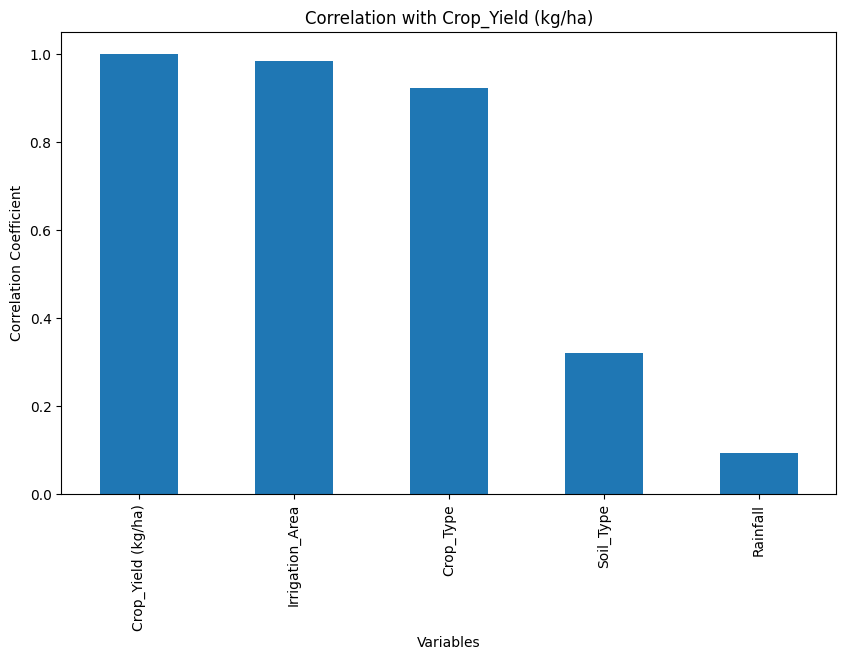

In [30]:
target_corr = train_df.corr()['Crop_Yield (kg/ha)']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Crop_Yield (kg/ha)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [31]:
X = train_df.drop(columns=['Crop_Yield (kg/ha)'])
y = train_df['Crop_Yield (kg/ha)']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((44, 4), (11, 4), (44,), (11,))

In [14]:
X_train.select_dtypes(include=['int', 'float']).columns

Index(['Year', 'Rainfall', 'Irrigation_Area'], dtype='object')

In [33]:
preprocessor = ColumnTransformer([ 
    ('numeric', num_pipe(scaling="minmax"), X_train.columns)
])

In [34]:
pipeline = Pipeline([ 
    ("prep", preprocessor),
    ("algo", RandomForestRegressor())  
])

model_regresi_RF_random = RandomizedSearchCV(pipeline, rsp.rf_params, n_iter=50, cv=5, n_jobs=-1, verbose=1)
model_regresi_RF_random.fit(X_train, y_train)

print(model_regresi_RF_random.best_params_)
print(model_regresi_RF_random.score(X_train, y_train), model_regresi_RF_random.best_score_, model_regresi_RF_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 32, 'algo__max_features': 0.9083476259575074, 'algo__min_samples_leaf': 3, 'algo__n_estimators': 137}
0.982870564950662 0.9569215737532921 0.974692199293348


In [36]:
pipeline = Pipeline([ 
    ("prep", preprocessor),
    ("algo", RandomForestRegressor())  
])

model_regresi_RF_grid = GridSearchCV(pipeline, gsp.rf_params, cv=5, n_jobs=-1, verbose=1)
model_regresi_RF_grid.fit(X_train, y_train)

print(model_regresi_RF_grid.best_params_)
print(model_regresi_RF_grid.score(X_train, y_train), model_regresi_RF_grid.best_score_, model_regresi_RF_grid.score(X_val, y_val))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 100}
0.9722214428789033 0.9552540824940939 0.9748265646990467


In [35]:
best_model_RF_random = model_regresi_RF_random.best_estimator_
y_pred_RF_random = best_model_RF_random.predict(X_val)

mae_RF_random    = mean_absolute_error(y_val,y_pred_RF_random)
mse_RF_random    = mean_squared_error(y_val,y_pred_RF_random)
r2_RF_random     = r2_score(y_val,y_pred_RF_random)
rmse_RF_random   = np.sqrt(mse_RF_random)
 
print(f"MAE     : {mae_RF_random}")
print(f"MSE     : {mse_RF_random}")
print(f"R²      : {r2_RF_random}")
print(f"RMSE    : {rmse_RF_random}")

MAE     : 190.79736335698527
MSE     : 63890.99818706121
R²      : 0.974692199293348
RMSE    : 252.76668725736232


In [37]:
best_model_RF_grid = model_regresi_RF_grid.best_estimator_
y_pred_RF_grid = best_model_RF_grid.predict(X_val)

mae_RF_grid    = mean_absolute_error(y_val,y_pred_RF_grid)
mse_RF_grid    = mean_squared_error(y_val,y_pred_RF_grid)
r2_RF_grid     = r2_score(y_val,y_pred_RF_grid)
rmse_RF_grid   = np.sqrt(mse_RF_grid)
 
print(f"MAE     : {mae_RF_grid}")
print(f"MSE     : {mse_RF_grid}")
print(f"R²      : {r2_RF_grid}")
print(f"RMSE    : {rmse_RF_grid}")

MAE     : 212.58256742150778
MSE     : 63551.78499380886
R²      : 0.9748265646990467
RMSE    : 252.09479366660642


In [38]:
submission_df_rf_reg = pd.DataFrame({
    'id': Id,  
    'Target': test_df_RF_random 
})
submission_df_rf_reg.to_csv('submissionRF_4.csv', index=False)

In [20]:
test_df_RF_random = best_model_RF_random.predict(test_df)
test_df_RF_grid = best_model_RF_grid.predict(test_df)

In [37]:
submission_df_xgb_reg = pd.DataFrame({
    'id': Id,  
    'Target': test_df_RF_random 
})
submission_df_xgb_reg.to_csv('submissionRF_2.csv', index=False)

In [43]:
param_grid = {'n_neighbors': [1, 2, 3, 4],
              'p': [1.2, 1.5, 2],
              'weights': ['uniform', 'distance']}

In [45]:
pipeline = Pipeline([ 
    ("prep", preprocessor),
    ("algo", KNeighborsRegressor(n_neighbors=3))  
])

model_regresi_KNN_random = RandomizedSearchCV(pipeline, rsp.knn_params, n_iter=50, cv=5, n_jobs=-1, verbose=1)
model_regresi_KNN_random.fit(X_train, y_train)

print(model_regresi_KNN_random.best_params_)
print(model_regresi_KNN_random.score(X_train, y_train), model_regresi_KNN_random.best_score_, model_regresi_KNN_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__n_neighbors': 3, 'algo__p': 1.0907760553234123, 'algo__weights': 'distance'}
1.0 0.9678361751458153 0.9746942974244474


c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [ 0.91846784  0.95754497  0.96783618  0.61665849  0.7819958   0.81405263
  0.87399216  0.93622909  0.91155619  0.96056923  0.93578226         nan
  0.96248897  0.42948018  0.87602219  0.96365712  0.74687167  0.9626032
  0.85878195  0.95411174  0.41138562         nan  0.89721721  0.9626032
  0.95775601  0.96336712  0.52370813  0.96638404  0.38842527  0.96060304
  0.96439514         nan  0.51515964         nan  0.36808705  0.46100443
  0.92804345 -0.12353469  0.96474476  0.96009062  0.9662029   0.37786489
  0.37865112  0.48110472  0.71272396  0.95353454  0.96524482  0.11347574
  0.95225085  0.15202628]
  warnings.warn(


In [46]:
best_model_KNN_random = model_regresi_KNN_random.best_estimator_
y_pred_KNN_random = best_model_KNN_random.predict(X_val)

mae_KNN_random    = mean_absolute_error(y_val,y_pred_KNN_random)
mse_KNN_random    = mean_squared_error(y_val,y_pred_KNN_random)
r2_KNN_random     = r2_score(y_val,y_pred_KNN_random)
rmse_KNN_random   = np.sqrt(mse_KNN_random)
 
print(f"MAE     : {mae_KNN_random}")
print(f"MSE     : {mse_KNN_random}")
print(f"R²      : {r2_KNN_random}")
print(f"RMSE    : {rmse_KNN_random}")

MAE     : 193.323780941867
MSE     : 63885.701334449885
R²      : 0.9746942974244474
RMSE    : 252.7562092896036


In [47]:
pipeline = Pipeline([ 
    ("prep", preprocessor),
    ("algo", XGBRegressor())  
])

model_regresi_XGB_random = RandomizedSearchCV(pipeline, rsp.xgb_params, n_iter=50, cv=5, n_jobs=-1, verbose=1)
model_regresi_XGB_random.fit(X_train, y_train)

print(model_regresi_XGB_random.best_params_)
print(model_regresi_XGB_random.score(X_train, y_train), model_regresi_XGB_random.best_score_, model_regresi_XGB_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__colsample_bytree': 0.6111853736220331, 'algo__gamma': 3, 'algo__learning_rate': 0.027276497993942186, 'algo__max_depth': 5, 'algo__n_estimators': 198, 'algo__reg_alpha': 1.1415170072400223, 'algo__reg_lambda': 0.008081439779627279, 'algo__subsample': 0.6692514422485962}
0.9998365044593811 0.9536614418029785 0.9788578748703003


In [48]:
best_model_XGB_random = model_regresi_XGB_random.best_estimator_
y_pred_XGB_random = best_model_XGB_random.predict(X_val)

mae_XGB_random    = mean_absolute_error(y_val,y_pred_XGB_random)
mse_XGB_random    = mean_squared_error(y_val,y_pred_XGB_random)
r2_XGB_random     = r2_score(y_val,y_pred_XGB_random)
rmse_XGB_random   = np.sqrt(mse_XGB_random)
 
print(f"MAE     : {mae_XGB_random}")
print(f"MSE     : {mse_XGB_random}")
print(f"R²      : {r2_XGB_random}")
print(f"RMSE    : {rmse_XGB_random}")

MAE     : 145.8810175115412
MSE     : 53374.45828362359
R²      : 0.9788578748703003
RMSE    : 231.02912864750107


In [49]:
test_df_XGB_random = best_model_XGB_random.predict(test_df)

In [50]:
submission_df_xgb_reg = pd.DataFrame({
    'id': Id,  
    'Target': test_df_RF_random 
})
submission_df_xgb_reg.to_csv('submissionXGB.csv', index=False)